In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

Cargar los datos

In [21]:
datos = pd.read_csv('winequality-red.csv', delimiter=(';'))
datos.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
datos.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


Crear dada nuevo con información relevante

In [23]:
new_data = datos[['fixed acidity','citric acid','density','pH']]
new_data.head()

,fixed acidity,citric acid,density,pH
0,7.4,0.00,0.9978,3.51
1,7.8,0.00,0.9968,3.20
2,7.8,0.04,0.9970,3.26
3,11.2,0.56,0.9980,3.16
4,7.4,0.00,0.9978,3.51


In [24]:
print(new_data.isnull().sum())

fixed acidity    0
citric acid      0
density          0
pH               0
dtype: int64


Analizar grafico de disperción

Text(0, 0.5, 'Fixed Acidity')

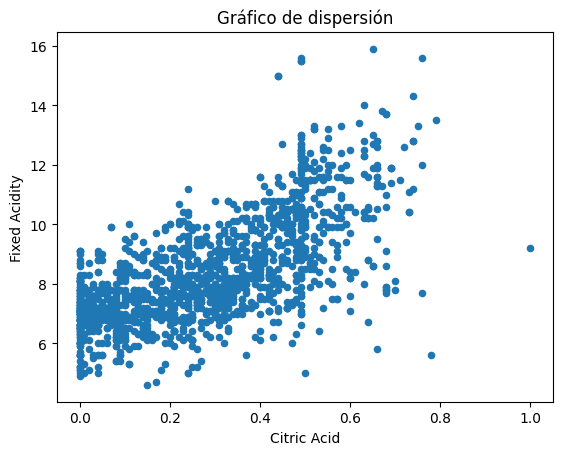

In [25]:
# Primer gráfico
new_data.plot.scatter(x='citric acid', y='fixed acidity')
plt.title('Gráfico de dispersión')
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')



Text(0, 0.5, 'Fixed Acidity')

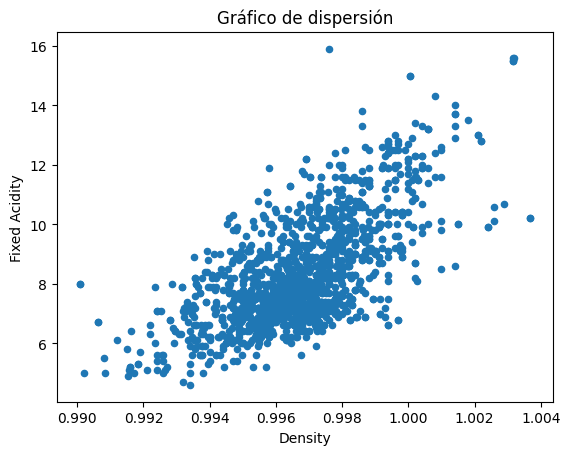

In [26]:
new_data.plot.scatter(x='density', y='fixed acidity')
plt.title('Gráfico de dispersión')
plt.xlabel('Density')
plt.ylabel('Fixed Acidity')

Text(0, 0.5, 'Fixed Acidity')

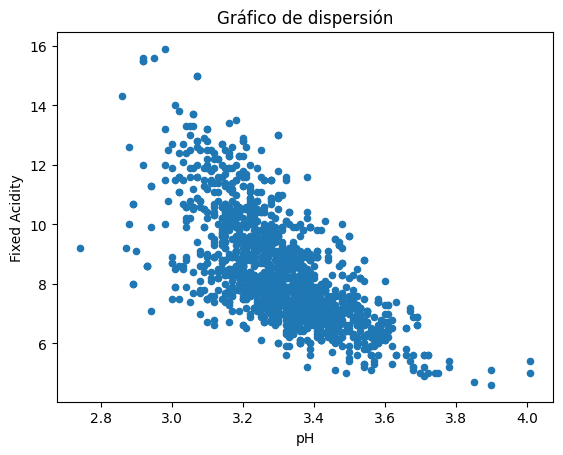

In [27]:
new_data.plot.scatter(x='pH', y='fixed acidity')
plt.title('Gráfico de dispersión')
plt.xlabel('pH')
plt.ylabel('Fixed Acidity')

In [28]:
new_data.corr()

,fixed acidity,citric acid,density,pH
fixed acidity,1.000000,0.671703,0.668047,-0.682978
citric acid,0.671703,1.000000,0.364947,-0.541904
density,0.668047,0.364947,1.000000,-0.341699
pH,-0.682978,-0.541904,-0.341699,1.000000


In [29]:
new_data.describe()

,fixed acidity,citric acid,density,pH
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.270976,0.996747,3.311113
std,1.741096,0.194801,0.001887,0.154386
min,4.600000,0.000000,0.990070,2.740000
25%,7.100000,0.090000,0.995600,3.210000
50%,7.900000,0.260000,0.996750,3.310000
75%,9.200000,0.420000,0.997835,3.400000
max,15.900000,1.000000,1.003690,4.010000


In [30]:
print(new_data.isnull().sum())

fixed acidity    0
citric acid      0
density          0
pH               0
dtype: int64


In [31]:
X = new_data[['density','citric acid','pH']]
y = new_data['fixed acidity']

In [32]:
X_train,X_Test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=880)

Crear el modelo

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_Test)


In [35]:
from sklearn.metrics import mean_squared_error


mse_traing = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(mse_traing,mse_traing)

0.7614921891955971 0.7614921891955971


In [38]:
density = 0.9980
citric_acid = 0
pH = 3.51

		

# Crear un DataFrame con los nombres de las características
valor = pd.DataFrame({'density': [density], 'citric acid': [citric_acid], 'pH': [pH]})

# Realizar la predicción
prediccion = model.predict(valor)
print(prediccion)


[7.22872767]
